# NetworkX
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. [Here](https://networkx.org/documentation/stable/tutorial.html) is a written tutorial of the basics of the library.  
[This video tutorial (8min)](https://www.youtube.com/watch?v=flwcAf1_1RU) covers the basic usage of networkx.

In Google Colab, networkx is already installed. If you work locally, install it by executing `python -m pip install networkx` in a terminal.  
## Toy Network
First we look at a simple toy network before we start with a big one😉


In [7]:
# Import networkx
import networkx as nx
import matplotlib.pyplot as plt

First create an empty graph. For this you can use `nx.Graph()`

In [23]:
# your code goes here:
G = nx.Graph()

You can add nodes to the graph by using `add_node` for adding one node or by using `add_nodes_from` with a given iterator.  
Now add following nodes to the graph `[1,2,3,4,5,6,7,8,9,10]`

In [24]:
# your code goes here:
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10])

Next we want to add edges. Same as with nodes you can add one edge with the method `add_edge` by giving the two nodes you want to connect, or by `add_edges_from` and given a list of tuples where in each tuple the nodes to connect are saved. For example if you want to connect node 1 to node 2 and node 3, you can use `add_edge`:
```python
G.add_edge(1,2)
G.add_edge(1,3)
```
or you can use `add_edge_from`:
```python
G.add_edge_from([(1,2),(1,3)])
```  
Now connect all nodes to node 1:

In [25]:
# your code goes here:
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])

Now let's visualize the network. For this you can use `nx.random_layout(G)`. To draw the network use `nx.draw_networkx`.

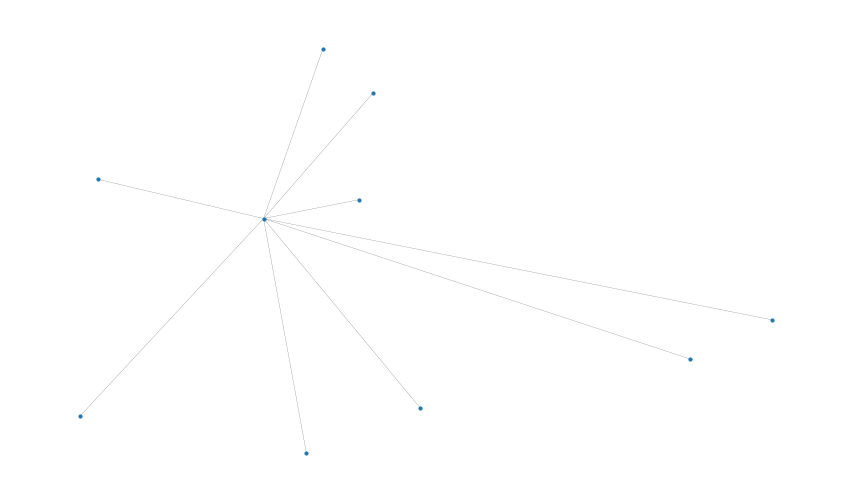

In [27]:
# your code goes here:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Lastly you can remove nodes and edges with `remove_node` and `remove_edge`.

## Facebook Network Analysis
Now we look at a bigger network.  
Modified from: https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html

This notebook contains a social network analysis mainly executed with the library of NetworkX. In detail, the facebook circles (friends lists) of ten people will be examined and scrutinized in order to extract all kinds of valuable information. The dataset can be found in the [stanford website](http://snap.stanford.edu/data/ego-Facebook.html). Moreover, as known, a facebook network is undirected and has no weights because one user can become friends with another user just once. Looking at the dataset from a graph analysis perspective:
* Each node represents an anonymized facebook user that belongs to one of those ten friends lists.
* Each edge corresponds to the friendship of two facebook users that belong to this network. In other words, two users must become friends on facebook in order for them to be connected in the particular network.

Note: Nodes $0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980$ are the ones whose friends list will be examined. That means that they are in the spotlight of this analysis. Those nodes are considered the `spotlight nodes`

* First the necessary libraries are imported

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

* The edges are loaded from the `data` folder and saved in a dataframe. Each edge is a new row and for each edge there is a `start_node` and an `end_node` column

In [2]:
facebook = pd.read_csv('facebook_combined.txt.gz', compression='gzip', sep=' ', names=['start_node', 'end_node'])
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


* The graph is created from the `facebook` dataframe of the edges:

In [3]:
G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')

## Visualizing the graph

Let's start our exploration by visualizing the graph. Visualization plays a
central role in exploratory data analysis to help get a qualitative feel for
the data.

Since we don't have any real sense of structure in the data, let's start by
viewing the graph with `random_layout`, which is among the fastest of the layout
functions.

For this you can use `nx.random_layout(G)`. To draw the network use `nx.draw_networkx`.

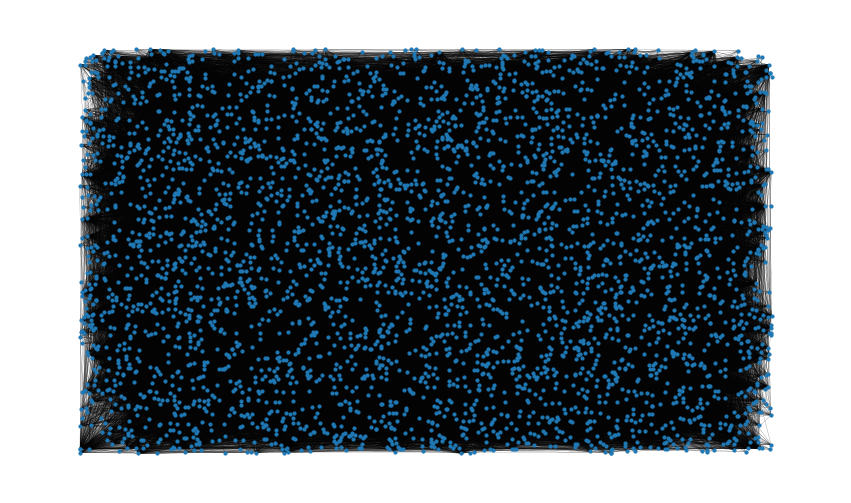

In [4]:
# your code goes here:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

The resulting image is... not very useful. Graph visualizations of this kind
are sometimes colloquially referred to as "hairballs" due to the overlapping
edges resulting in an entangled mess.

It's clear that we need to impose more structure on the positioning of the if
we want to get a sense for the data. For this, we can use the `spring_layout`
function which is the default layout function for the networkx drawing module.
The `spring_layout` function has the advantage that it takes into account the
nodes and edges to compute locations of the nodes. The downside however, is
that this process is much more computationally expensive, and can be quite
slow for graphs with 100's of nodes and 1000's of edges.

Since our dataset has over 80k edges, you should limit the number of iterations
used in the `spring_layout` function to reduce the computation time.
We will also save the computed layout so we can use it for future
visualizations.

You can also try out different layouts. 
[Here](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) 
is a list with different layouts to choose from.

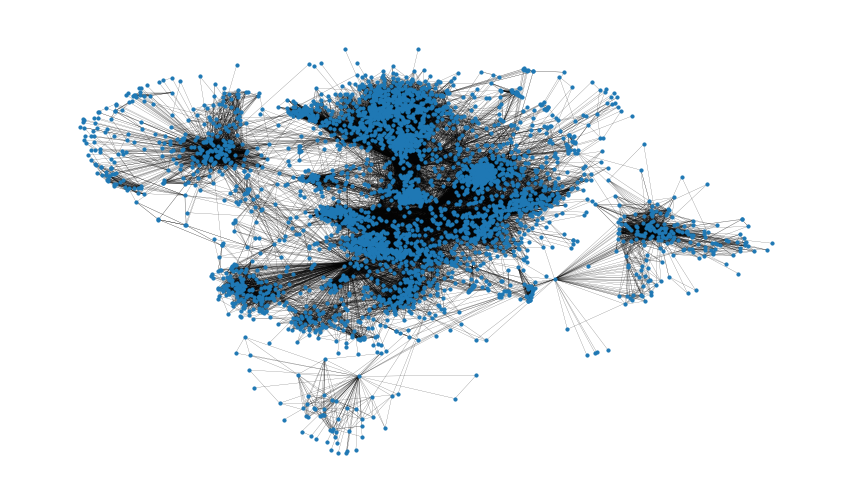

In [5]:
# your code goes here:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

This visualization is much more useful than the previous one! Already we can
glean something about the structure of the network; for example, many of the
nodes seem to be highly connected, as we might expect for a social network.
We also get a sense that the nodes tend to form clusters. The `spring_layout`
serves to give a qualitative sense of clustering, but it is not designed for
repeatable, qualitative clustering analysis. We'll revisit evaluating
network clustering [later in the analysis](#clustering-effects)

## Basic topological attributes
Now lets have a deeper look at the topology of the graph.  
Output the total number of nodes in network and total number of edges:

In [6]:
# your code goes here:
print(f"Total number of nodes: {G.number_of_nodes()}")
print(f"Total number of edges: {G.number_of_edges()}")

Total number of nodes: 4039
Total number of edges: 88234


Try to output the average number of degrees of the graph. You can create a list of all the degrees of the nodes and use `np.mean` to calculate their mean:

In [7]:
# your code goes here:
np.mean([d for _, d in G.degree()])

43.69101262688784

There are many interesting properties related to the distribution of *paths*
through the graph.
For example, the *diameter* of a graph represents the longest of the
shortest-paths that connect any node to another node in the Graph.
Similarly, the average path length gives a measure of the average number of
edges to be traversed to get from one node to another in the network.
These attributes can be calculated with the `nx.diameter` and
`nx.average_shortest_path_length` functions, respectively.
Note however that these analyses require computing the shortest path between
every pair of nodes in the network: this can be quite expensive for networks
of this size!
Since we're interested in several analyses involving the shortest path length
for all nodes in the network, we can instead compute this once and reuse the
information to save computation time.

Let's start by computing the shortest path length for all pairs of nodes in the
network. For this you can use `nx.all_pairs_shortest_path_length` method and cast it to 
a dictionary. This computation might take a while ;)
`nx.all_pairs_shortest_path_length` returns a dict-of-dict that maps a node `u`
to all other nodes in the network, where the inner-most mapping returns the
length of the shortest path between the two nodes.
In other words, `shortest_path_lengths[u][v]` will return the shortest path
length between any two pair of nodes `u` and `v`.

In [8]:
# your code goes here:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][42]

1

Now let's use `shortest_path_lengths` to perform our analyses, starting with
the *diameter* of `G`.
If we look carefully at the [docstring for `nx.diameter`][nx_diameter_], we see
that it is equivalent to the maximum *eccentricity* of the graph.
It turns out that `nx.eccentricity` has an optional argument `sp` where we can
pass in our pre-computed `shortest_path_lengths` to save the extra computation.
Now ues `nx.eccentricity` and `max` to calculate the maximum *eccentricity* of
the graph. As said you should use the optional argument `sp` for that.

In [9]:
# your code goes here:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
print(f"Diameter of the Network {diameter}")

Diameter of the Network 8


[nx_diameter_]: https://networkx.org/documentation/latest/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html

Next up, the average path length is found.
Again, we could use `nx.average_shortest_path_length` to compute this
directly, but it's much more efficient to use the `shortest_path_length` that
we've already computed. For this you have to calculate the mean of all shorthest path
lenghts have to be calculated:

In [10]:
# your code goes here:
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

This represents the average of the shortest path length for all pairs of nodes

The above measures capture useful information about the network, but metrics
like the average value represent only a moment of the distribution; it is
also often valuable to look at the *distribution* itself.
Again, we can construct a visualization of the distribution of shortest path
lengths from our pre-computed dict-of-dicts. For this create a bar plot with
matplotlib, on the x-Axis the shortest path lengths should be plotted and on the 
y-Axis the corresponding frequency in percent:

Text(0, 0.5, 'Frequency (%)')

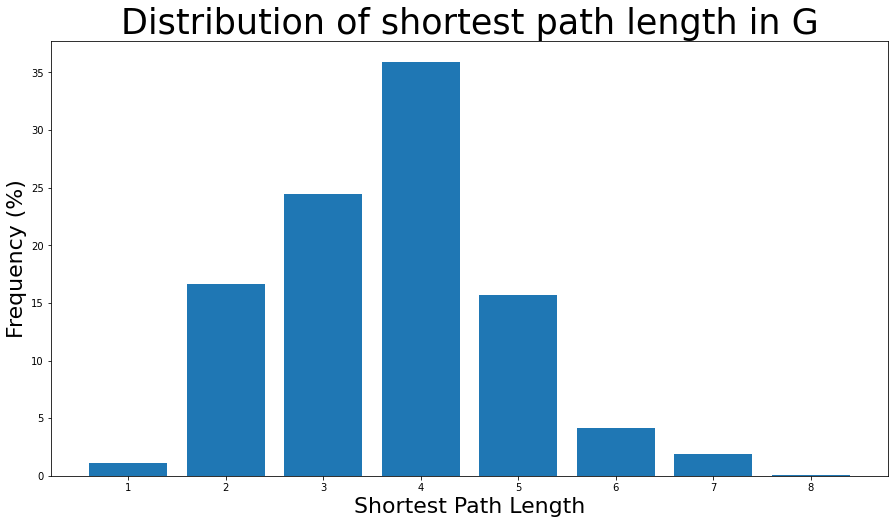

In [11]:
# your code goes here:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})



* The graph's density is calculated here. Clearly, the graph is a very sparse one as: $density < 1$
Next on calculate the density of the graph and the number of connected components. This can be done with `nx.density` and
`nx.number_connected_components`:

In [12]:
# your code goes here:
print(f"Density of the Graph: {nx.density(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

Density of the Graph: 0.010819963503439287
Number of connected components: 1


## Centrality measures
Now the centrality measures will be examined for the facebook graph

### Degree Centrality
Degree centrality assigns an importance score based simply on the number of links held by each node. In this analysis, that means that the higher the degree centrality of a node is, the more edges are connected to the particular node and thus the more neighbor nodes (facebook friends) this node has. In fact, the degree of centrality of a node is the fraction of nodes it is connected to. In other words, it is the percentage of the network that the particular node is connected to meaning being friends with.  
Calculate the nodes with the highest degree centralities. Output the 8 nodes with the highest degree centralities. You can use `nx.centrality.degree_centrality`:

In [13]:
# your code goes here:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again 
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

Plot the distribution of degree centralities. Use matplotlib to create a histogram, where the x-axis shows the degree centralities and the y-axis shows their counts.

Text(0, 0.5, 'Counts')

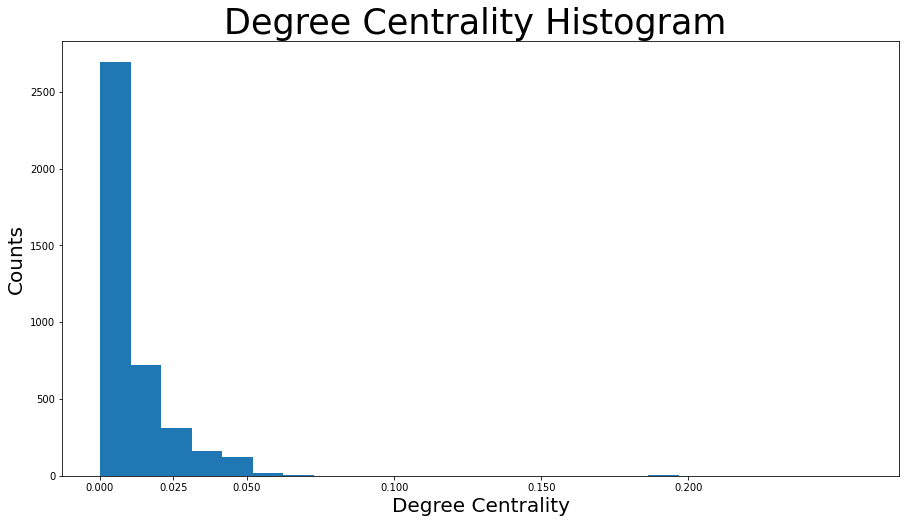

In [14]:
# your code goes here:
plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

Now let's plot the users with highest degree centralities from the size of their nodes. For this use `nx.draw_network` again, using the parameter `node_size` to set the size of the nodes. The ones with a higher degree centratlity should be bigger:

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

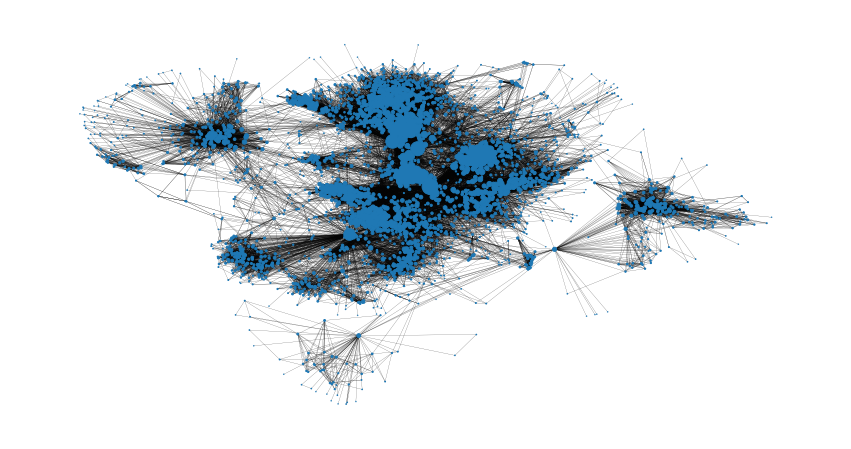

In [15]:
# your code goes here:
node_size =  [v * 1000 for v in degree_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

### Betweenness Centrality
Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node $v$ is the percentage of all the shortest paths of any two nodes (apart from $v$), which pass through $v$. Specifically, in the facebook graph this measure is associated with the user's ability to influence others. A user with a high betweenness centrality acts as a bridge to many users that are not friends and thus has the ability to influence them by conveying information (e.g. by posting something or sharing a post) or even connect them via the user's circle (which would reduce the user's betweeness centrality after).  
Compute the nodes with the $8$ highest betweenness centralities with their centrality values. You can use `nx.centrality.betweenness_centrality` (this might take a while to execute).

In [16]:
# your code goes here:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  # save results in a variable to use again 
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

Moving on, the distribution of betweenness centralities must be plotted. Again, use matplotlib to create a histogram!

Text(0, 0.5, 'Counts')

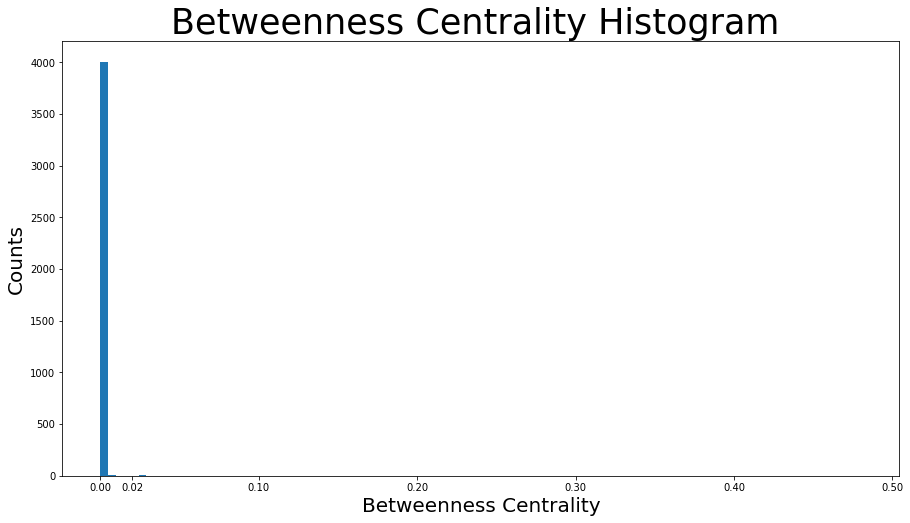

In [18]:
# your code goes here:
plt.figure(figsize=(15,8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title('Betweenness Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Betweenness Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

We can also get an image on the nodes with the highest betweenness centralities and where they are located in the network. It is clear that they are the bridges from one community to another. Again plot the users with highest betweenness centralities from the size of their nodes. For this use again `nx.draw_network` and use the parameter `node_size` to set the size of the nodes. The ones with a higher betweenness centratlity should be bigger:

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

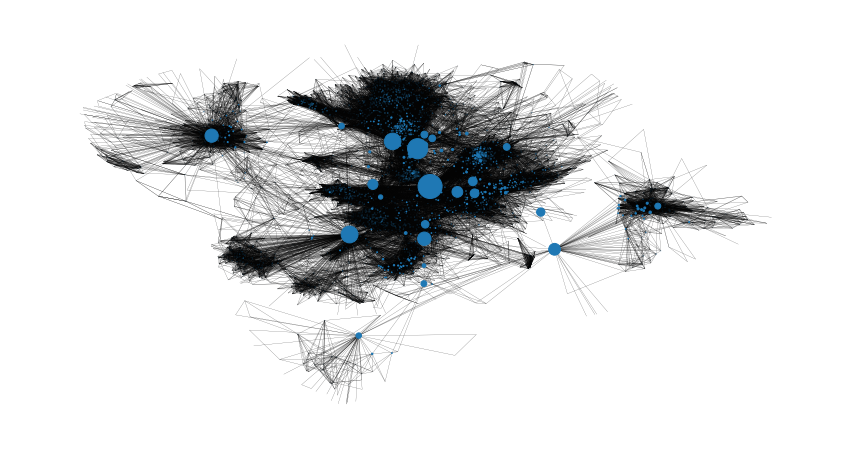

In [19]:
# your code goes here:
node_size =  [v * 1200 for v in betweenness_centrality.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis('off')

There are also other centrality measures available for a full list look [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html).

## Clustering Effects
The clustering coefficient of a node $v$ is defined as the probability that two randomly selected friends of $v$ are friends with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. The closer the average clustering coefficient is to $1$, the more complete the graph will be because there's just one giant component. Lastly, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually arise.  
Compute the average clustering coefficient with the help of `nx.average_clustering`:

In [27]:
# your code goes here:
nx.average_clustering(G)

0.6055467186200876

Get the clustering coefficient using `nx.clustering` and plot a histogram of its distribution.

Text(0, 0.5, 'Counts')

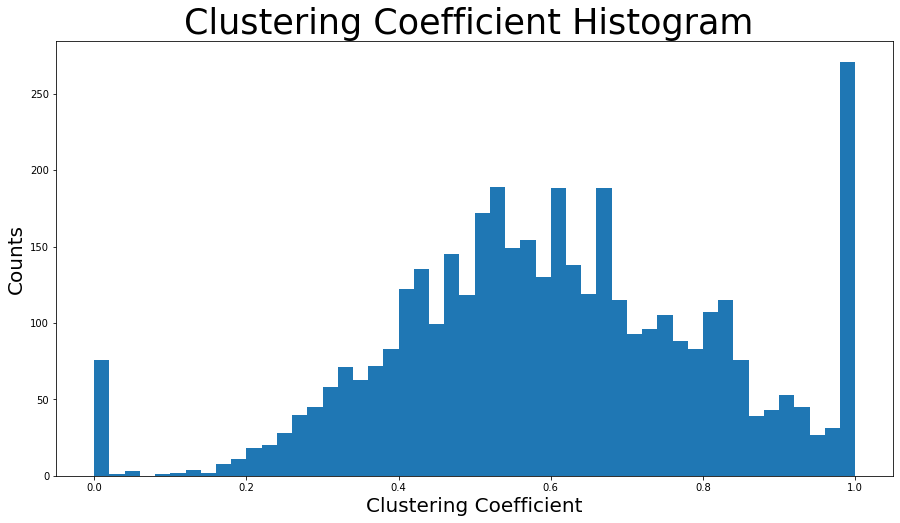

In [28]:
# your code goes here:
plt.figure(figsize=(15,8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title('Clustering Coefficient Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Clustering Coefficient', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

## Bridges
First of all, an edge joining two nodes A and B in the graph is considered a bridge, if deleting the edge would cause A and B to lie in two different components. Now it is checked if there are any bridges in this network this can be done with `nx.has_bridges`:

In [29]:
# your code goes here:
nx.has_bridges(G)

True

Now the edges that are bridges should be saved in a list and the number of them should be printed. For this you can use `nx.bridges`:

In [30]:
# your code goes here:
bridges = list(nx.bridges(G))
print(f"Number of bridges {len(bridges)}")

Number of bridges 75


The existence of so many bridges is due to the fact that this network only contains the spotlight nodes and the friends of them. As a result, some friends of spotlight nodes are only connected to a spotlight node, making that edge a bridge.

Also, compute the edges that are local bridges and print their number. In detaill, an edge joining two nodes $C$ and $D$ 
in a graph is a local bridge, if its endpoints $C$ and $D$ have no friends in common. Very importantly, an edge that is a bridge is also a local bridge. Thus, this list contains all the above bridges as well. This can be done with `nx.local_bridges`:

In [31]:
# your code goes here:
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

78

Now we want to show the bridges and local bridges in the network. This can be done with `nx.draw_networkx` and `nx.draw_networkx_edges`. Use the parameter `edgelist` to draw the bridges and the local bridges:

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

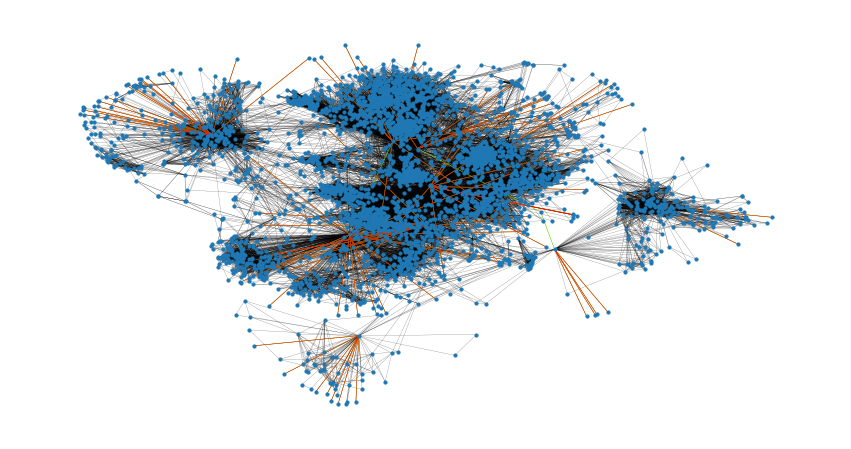

In [32]:
# your code goes here:
plt.figure(figsize=(15,8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen")  # green color for local bridges 
nx.draw_networkx_edges(G, pos, edgelist=bridges, width=0.5, edge_color="r")  # red color for bridges
plt.axis('off')

## Assortativity
Assortativity describes the preference for a network's nodes to attach to others that are similar in some way.
Calculate the assortativity of the network. You can use `nx.degree_assortativity_coefficient` or `nx.degree_pearson_correlation_coefficient` (the latter might be faster).

In [33]:
# your code goes here:
nx.degree_assortativity_coefficient(G)

0.06357722918564943

The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. That means that it takes values from $-1$ to $1$. In detail, a positive assortativity coefficient indicates a correlation between nodes of similar degree, while a negative indicates correlation between nodes of different degrees.

## Network Communities
A community is a group of nodes, so that nodes inside the group are connected with many more edges than between groups. Two different algorithms will be used for communities detection in this network
* Firstly, a semi-synchronous label propagation method[^1] should be used to detect the communities.

The function `nx.community.label_propagation_communities` determines the number of communities that will be detected. Now the communities should be iterated through and a colors list should be created to contain the same color for nodes that belong to the same community. Also, the number of communities should be printed:

In [35]:
# your code goes here:
colors = ['' for x in range (G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = '#%06X' % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(com):  # fill colors list with the particular color for the community nodes
        colors[node] = color
print(f"Number of comunities {counter}")

Number of comunities 44


Now the communities should be showcased in the graph. Each community should be depicted with a different color and its nodes are usually located close to each other. For this you can again use `nx.draw_network` and pass the parameter `node_color`:

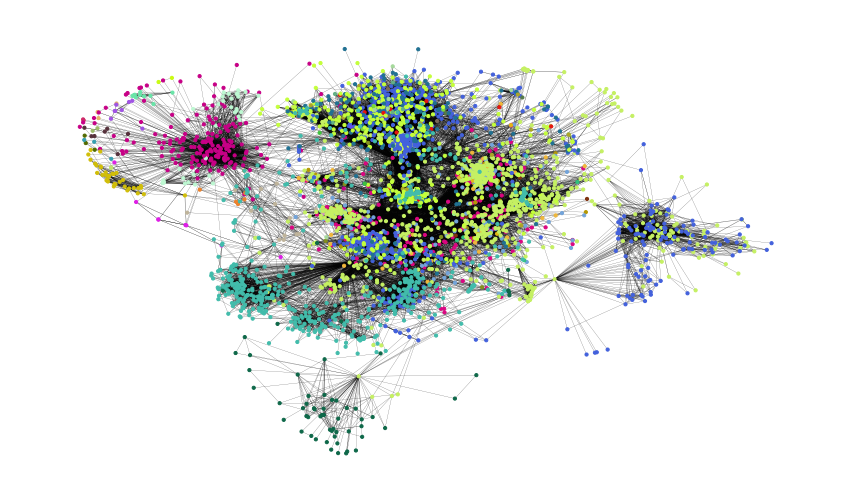

In [36]:
# your code goes here:
plt.figure(figsize=(15,9))
plt.axis('off') 
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)

* Next, the asynchronous fluid communities algorithm should be used. 

With the function `nx.community.asyn_fluidc`, we can decide the number of communities to be detected. Let's say that $8$ communities is the number we want. Again, iterate over the communities and create a colors list to contain the same color for nodes that belong to the same community.

In [37]:
# your code goes here:
colors = ['' for x in range (G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 8, seed=0):
    color = '#%06X' % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color

Now show the $8$ communities in the graph. Again, each community should be depicted with a different color. One last time, use `nx.draw_networkx` and for the parameter `node_colors` use the created colors.

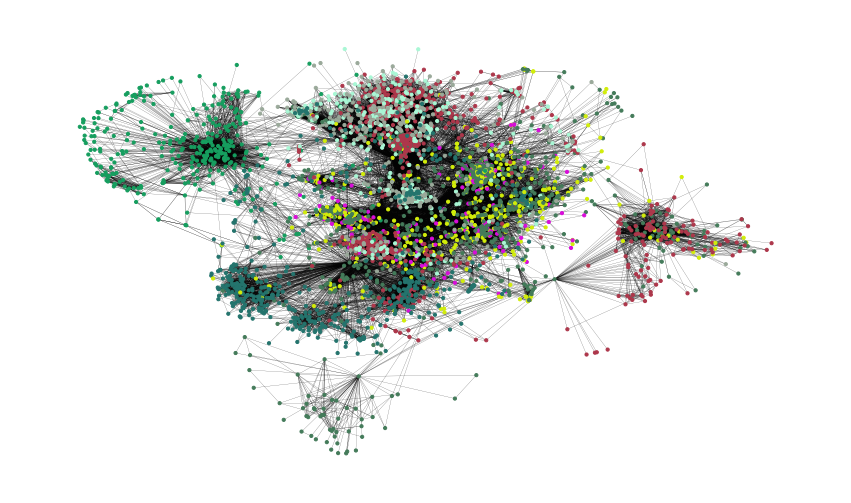

In [38]:
# your code goes here:
plt.figure(figsize=(15,9))
plt.axis('off') 
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)

### References
[Cambridge-intelligence](https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/#:~:text=Centrality%20measures%20are%20a%20vital,but%20they%20all%20work%20differently.)

[^1]: [Semi-synchronous label propagation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html#networkx.algorithms.community.label_propagation.label_propagation_communities)

[^2]: [Asynchronous fluid communities algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.asyn_fluid.asyn_fluidc.html#networkx.algorithms.community.asyn_fluid.asyn_fluidc)